In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


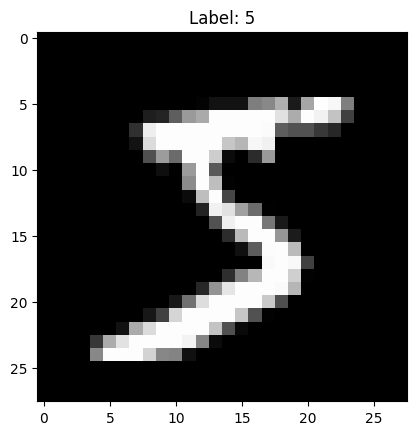

In [ ]:
plt.imshow(x_train[0], cmap = 'gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Build your model:

model = code to create tensorflow Sequential model

model.add( layers.Dense() )

Specify how many neurons, and activation function. ex( model.Dense(3, activation = 'sigmoid') )
model.add( layers.Flatten() )

Flattens the image into one flat line
After the model is created, you can do model.compile()

Specify loss function, and optimizer
ex. model.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )

In [ ]:
#define your model here. ie, "model = "
model = tf.keras.Sequential()

In [ ]:
#create your model here
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))  # Add dropout
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # Add dropout
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=10, batch_size=32)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6894 - loss: 0.8684
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9484 - loss: 0.1903
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9603 - loss: 0.1459
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9680 - loss: 0.1207
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9714 - loss: 0.1052
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9739 - loss: 0.0935
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9766 - loss: 0.0845
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9786 - loss: 0.0818
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9801 - loss: 0.0702
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9820 - loss: 0.0662
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9715 - loss: 0.1119
Test Accuracy: 0.9779000282287598


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


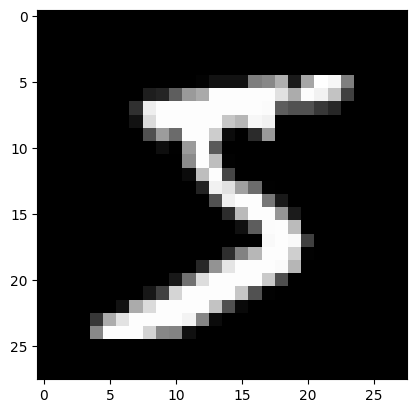

Prediction:  5


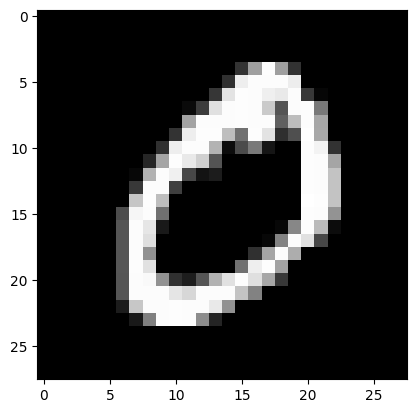

Prediction:  0


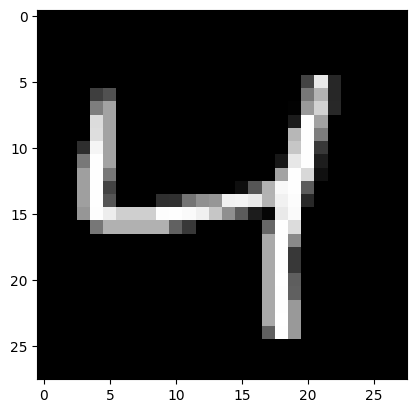

Prediction:  4


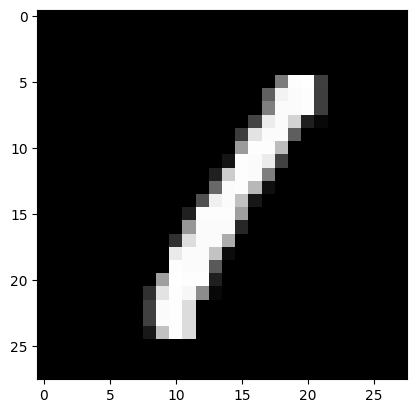

Prediction:  1


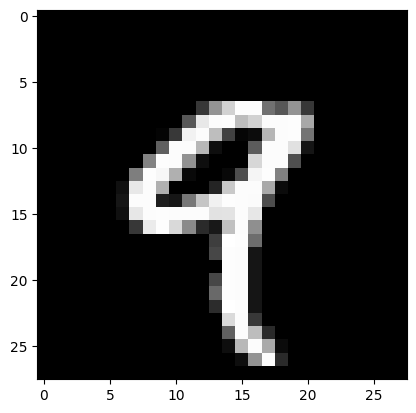

Prediction:  9


In [ ]:
#View your model in action
number_of_images = 5

probabilities = model.predict(x_train[:number_of_images])
predictions = np.argmax(probabilities, axis=1)
for index in range(len(probabilities)):
  plt.imshow(x_train[index], cmap='gray')
  plt.show()
  print("Prediction: ", predictions[index])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


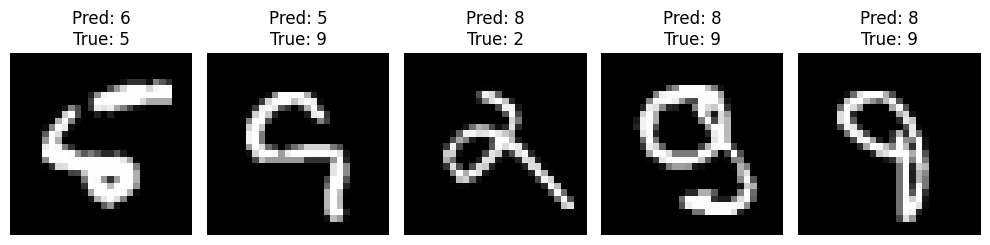

In [ ]:
#Look at incorrect predictions:
test_probabilities = model.predict(x_test)
test_predictions = np.argmax(test_probabilities, axis=1)

incorrect_indices = np.where(test_predictions != y_test)[0]

num_incorrect = 5

plt.figure(figsize=(10, 5))
for i in range(num_incorrect):
    plt.subplot(1, num_incorrect, i + 1)  # Create a subplot
    idx = incorrect_indices[i]  # Get the index of the incorrect prediction
    plt.imshow(x_test[idx], cmap='gray')  # Display the image
    plt.title(f"Pred: {test_predictions[idx]}\nTrue: {y_test[idx]}")  # Show predicted and true labels
    plt.axis('off')  # Hide axes

plt.tight_layout()
plt.show()